# Clustering

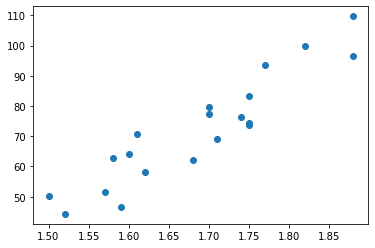

In [8]:
data = np.array([[1.75,83.4],[1.59,46.7],[1.62,58.3],[1.58,62.9],[1.6,64.1], 
                 [1.82,99.8],[1.7,79.8],[1.75,74.3],[1.61,70.9], [1.71,69], 
                 [1.74,76.2],[1.52,44.3],[1.75,73.6],[1.68,62],[1.77,93.6], 
                 [1.5,50.1],[1.88,109.7],[1.57,51.6],[1.88,96.5],[1.7,77.5]]) 
 
import matplotlib.pyplot as plt 
plt.scatter(data[:,0],data[:,1]) 

In [2]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2, random_state=1) 
kmeans.fit(data) 
print(kmeans.cluster_centers_) 

[[ 1.598 57.99 ]
 [ 1.774 86.44 ]]


In [3]:
print("Cluster Assignment: ", kmeans.labels_) 
print("Sum of Squared Distance: ", kmeans.inertia_) 

Cluster Assignment:  [1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1]
Sum of Squared Distance:  2205.8882000000003


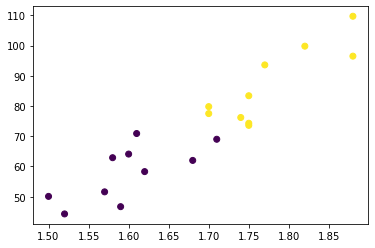

In [4]:
import matplotlib.pyplot as plt 
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_.astype(float)) 
plt.show()

Centorids:  [[1760.83333333   82.95      ]
 [1573.75         56.1125    ]]
Cluster Assignment:  [0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0]
Sum of Distance:  64874.785416666666


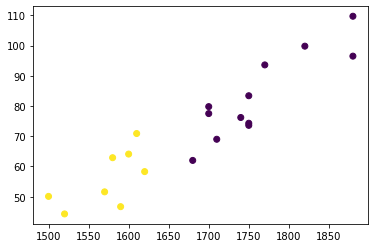

In [5]:
data_mm = np.copy(data) 
data_mm[:,0] = data[:,0]*1000 
 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2, random_state=1)  
kmeans.fit(data_mm) 
 
print("Centorids: ", kmeans.cluster_centers_) 
print("Cluster Assignment: ", kmeans.labels_) 
print("Sum of Distance: ", kmeans.inertia_) 
 
import matplotlib.pyplot as plt 
plt.scatter(data_mm[:,0],data_mm[:,1], c=kmeans.labels_.astype(float)) 
plt.show() 

In [6]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler().fit(data) 
print("Mean of data",scaler.mean_) 
print("Std Dev of data",scaler.scale_) 
 
print("Scaled Data") 
data_scaled = scaler.transform(data) 
print(data_scaled)

Mean of data [ 1.686 72.215]
Std Dev of data [ 0.1072567  17.68166494]
Scaled Data
[[ 0.59669931  0.63257618]
 [-0.89504897 -1.44302022]
 [-0.61534617 -0.7869734 ]
 [-0.98828324 -0.52681691]
 [-0.8018147  -0.45894999]
 [ 1.24933919  1.56009064]
 [ 0.13052797  0.42897544]
 [ 0.59669931  0.11791876]
 [-0.70858043 -0.07437082]
 [ 0.22376224 -0.18182677]
 [ 0.50346504  0.2253747 ]
 [-1.54768884 -1.57875404]
 [ 0.59669931  0.07832973]
 [-0.05594056 -0.57771709]
 [ 0.78316785  1.20944493]
 [-1.73415738 -1.25073063]
 [ 1.80874479  2.11999267]
 [-1.0815175  -1.16589699]
 [ 1.80874479  1.37345663]
 [ 0.13052797  0.29889719]]


In [7]:
from sklearn import metrics 
metrics.silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')

0.5154460942106814

# Classification

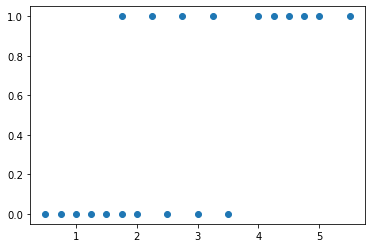

In [9]:
import numpy as np 
X = np.array([[0.5],[0.75],[1],[1.25],[1.5],[1.75],[1.75],[2],[2.25],[2.5], 
              [2.75],[3],[3.25],[3.5],[4],[4.25],[4.5],[4.75],[5],[5.5]]) 
y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]) 
 
import matplotlib.pyplot as plt 
plt.scatter(X,y)

In [10]:
from sklearn.svm import LinearSVC 
sv_clf = LinearSVC(C=1, loss='hinge', max_iter=1000, random_state=0).fit(X,y) 
print("Intercept: ", sv_clf.intercept_) 
print("Coefficient: ", sv_clf.coef_) 

Intercept:  [-1.61540154]
Coefficient:  [[0.61540154]]


In [11]:
print("Response y if study hours is 2.1 => ", sv_clf.decision_function([[2.1]])) 
print("Response y if study hours is 2.9 => ", sv_clf.decision_function([[2.9]])) 
print("Prediction if study hours is 2.1 => ", sv_clf.predict([[2.1]])) 
print("Prediction if study hours is 2.9 => ", sv_clf.predict([[2.9]])) 

Response y if study hours is 2.1 =>  [-0.3230583]
Response y if study hours is 2.9 =>  [0.16926293]
Prediction if study hours is 2.1 =>  [0]
Prediction if study hours is 2.9 =>  [1]


In [12]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y, sv_clf.predict(X))

array([[8, 2],
       [2, 8]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
 
print("Model accuracy: ", accuracy_score(y, sv_clf.predict(X))) 
print("Model precision: ", precision_score(y, sv_clf.predict(X))) 
print("Model recall: ", recall_score(y, sv_clf.predict(X))) 
print("Model F1 Score: ", f1_score(y, sv_clf.predict(X)))

Model accuracy:  0.8
Model precision:  0.8
Model recall:  0.8
Model F1 Score:  0.8000000000000002


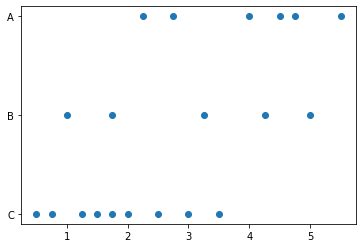

In [14]:
import numpy as np 
X = np.array([[0.5],[0.75],[1],[1.25],[1.5],[1.75],[1.75],[2],[2.25],[2.5], 
              [2.75],[3],[3.25],[3.5],[4],[4.25],[4.5],[4.75],[5],[5.5]]) 
grade = np.array(['C','C','B','C','C','C','B','C','A','C', 
                  'A','C','B','C','A','B','A','A','B','A']) 
 
import matplotlib.pyplot as plt 
plt.scatter(X,grade) 

In [15]:
y_A = np.array([0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1]) 
 
from sklearn.svm import LinearSVC 
sv_clf_A = LinearSVC(C=1, loss='hinge', max_iter=1000, random_state=0).fit(X,y_A) 
print("Intercept: ", sv_clf_A.intercept_) 
print("Coefficient: ", sv_clf_A.coef_) 

Intercept:  [-1.10769231]
Coefficient:  [[0.06153846]]


In [16]:
from sklearn.svm import LinearSVC 
sv_grade = LinearSVC(C=1, loss='hinge', max_iter=1000, random_state=0).fit(X,grade) 
print("Intercept: ", sv_grade.intercept_) 
print("Coefficient: ", sv_grade.coef_) 
print("Prediction if study hours is 3.9 => ", sv_grade.predict([[3.9]])) 
print("Prediction if study hours is 4.1 => ", sv_grade.predict([[4.1]])) 

Intercept:  [-1.10769231 -1.0000044   1.42856337]
Coefficient:  [[ 6.15384615e-02]
 [ 1.46579141e-06]
 [-5.71417826e-01]]
Prediction if study hours is 3.9 =>  ['C']
Prediction if study hours is 4.1 =>  ['A']


In [17]:
 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
print(confusion_matrix(grade, sv_grade.predict(X))) 
print("Model accuracy: ", accuracy_score(grade, sv_grade.predict(X)))

[[3 0 3]
 [2 0 3]
 [0 0 9]]
Model accuracy:  0.6


[Text(167.4, 181.2, 'X[0] <= 3.75\ngini = 0.645\nsamples = 20\nvalue = [6, 5, 9]'),
 Text(83.7, 108.72, 'X[0] <= 2.125\ngini = 0.52\nsamples = 14\nvalue = [2, 3, 9]'),
 Text(41.85, 36.23999999999998, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.611\nsamples = 6\nvalue = [2, 1, 3]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 4.125\ngini = 0.444\nsamples = 6\nvalue = [4, 2, 0]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.48\nsamples = 5\nvalue = [3, 2, 0]')]

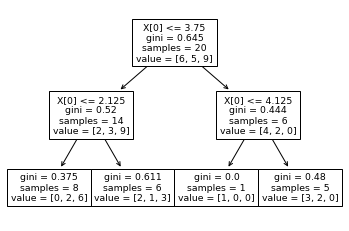

In [18]:
import numpy as np 
X = np.array([[0.5],[0.75],[1],[1.25],[1.5],[1.75],[1.75],[2],[2.25],[2.5], 
              [2.75],[3],[3.25],[3.5],[4],[4.25],[4.5],[4.75],[5],[5.5]]) 
grade = np.array(['C','C','B','C','C','C','B','C','A','C', 
                  'A','C','B','C','A','B','A','A','B','A']) 
 
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier(max_depth=2,random_state=0).fit(X,grade) 
  
from sklearn import tree 
tree.plot_tree(dt_clf) 

In [19]:

 
print("Prediction if study hours is 2 => ", dt_clf.predict([[2]])) 
print("Prediction if study hours is 5 => ", dt_clf.predict([[5]])) 

Prediction if study hours is 2 =>  ['C']
Prediction if study hours is 5 =>  ['A']


In [20]:
print("Prediction probabilities (x=2) => ", dt_clf.predict_proba([[2]])) 
print("Prediction probabilities (x=5) => ", dt_clf.predict_proba([[5]])) 

Prediction probabilities (x=2) =>  [[0.   0.25 0.75]]
Prediction probabilities (x=5) =>  [[0.6 0.4 0. ]]


In [21]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
print(confusion_matrix(grade, dt_clf.predict(X))) 
print("Model accuracy: ", accuracy_score(grade, dt_clf.predict(X)))

[[4 0 2]
 [2 0 3]
 [0 0 9]]
Model accuracy:  0.65


In [24]:
import numpy as np 
X = np.array([[0.5],[0.75],[1],[1.25],[1.5],[1.75],[1.75],[2],[2.25],[2.5], 
              [2.75],[3],[3.25],[3.5],[4],[4.25],[4.5],[4.75],[5],[5.5]]) 
grade = np.array(['C','C','B','C','C','C','B','C','A','C', 
                  'A','C','B','C','A','B','A','A','B','A']) 
 
from sklearn.tree import DecisionTreeClassifier 
dt_clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0) 
  
from sklearn import tree 
tree.plot_tree(dt_clf1) 

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [25]:
import numpy as np 
X = np.array([[0.5],[0.75],[1],[1.25],[1.5],[1.75],[1.75],[2],[2.25],[2.5], 
              [2.75],[3],[3.25],[3.5],[4],[4.25],[4.5],[4.75],[5],[5.5]]) 
grade = np.array(['C','C','B','C','C','C','B','C','A','C', 
                  'A','C','B','C','A','B','A','A','B','A']) 
 
from sklearn.linear_model import LogisticRegression 
log_clf = LogisticRegression(multi_class='multinomial',C=10000, 
                             random_state=0).fit(X, grade) 
 
print("Intercept: ", log_clf.intercept_) 
print("Coefficient: ", log_clf.coef_)

Intercept:  [-2.03341229 -0.24301607  2.27642836]
Coefficient:  [[ 0.64072166]
 [ 0.0805862 ]
 [-0.72130786]]


In [26]:
print("Prediction probabilities (x=2) => ", log_clf.predict_proba([[2]])) 
print("Prediction if study hours is 2 => ", log_clf.predict([[2]])) 

Prediction probabilities (x=2) =>  [[0.12759026 0.2493729  0.62303684]]
Prediction if study hours is 2 =>  ['C']


# Regression

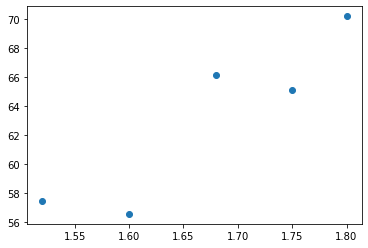

In [28]:
import numpy as np 
X = np.array([[1.52],[1.60],[1.68],[1.75],[1.80]]) 
y = np.array([57.48,56.57,66.11,65.10,70.19]) 
 
import matplotlib.pyplot as plt 
plt.scatter(X,y)

In [29]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression().fit(X, y) 
print("Intercept: ", lr.intercept_) 
print("Coefficient: ", lr.coef_)

Intercept:  -16.198838582677162
Coefficient:  [47.47834646]


In [30]:
print("Estimated weight of 1.65m individual => ", lr.predict([[1.65]]))

Estimated weight of 1.65m individual =>  [62.14043307]


In [31]:
print("R-sq of model: ", lr.score(X, y)) 

R-sq of model:  0.8325011000770435


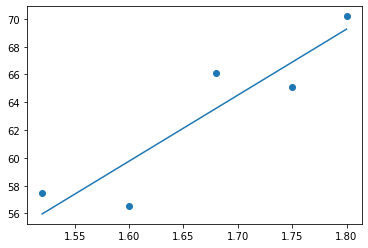

In [32]:
X_smooth = np.linspace(X[0], X[4], num=100) 
 
import matplotlib.pyplot as plt 
plt.scatter(X,y) 
plt.plot(X_smooth, lr.predict(X_smooth)) 
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=3, include_bias=False) 
X_poly = poly_features.fit_transform(X) 
print(X_poly)

[[1.52     2.3104   3.511808]
 [1.6      2.56     4.096   ]
 [1.68     2.8224   4.741632]
 [1.75     3.0625   5.359375]
 [1.8      3.24     5.832   ]]


In [34]:
from sklearn.linear_model import LinearRegression 
pr = LinearRegression().fit(X_poly, y) 
print("Intercept: ", pr.intercept_) 
print("Coefficient: ",pr.coef_) 

Intercept:  6222.530787592063
Coefficient:  [-11157.00081207   6693.17765818  -1329.99968084]


In [35]:
print("R-sq of model: ", pr.score(X_poly, y)) 

R-sq of model:  0.865313205610426


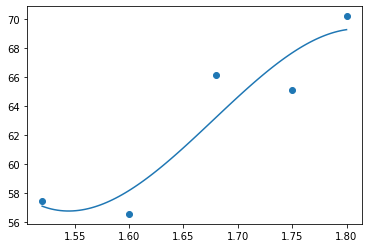

In [36]:
X_smooth = np.linspace(X[0], X[4], num=100) 
X_poly_smooth = poly_features.fit_transform(X_smooth) 
 
import matplotlib.pyplot as plt 
plt.scatter(X,y) 
plt.plot(X_smooth, pr.predict(X_poly_smooth)) 
plt.show()

In [37]:
i=1 
y_test = y[i] 
X_test = X[i] 
y_train = np.delete(y, i, axis=0) 
X_train = np.delete(X, i, axis=0) 
 
print("y_test: ", y_test) 
print("X_test: ", X_test) 
print("y_train: ", y_train) 
print("X_train \n", X_train) 

y_test:  56.57
X_test:  [1.6]
y_train:  [57.48 66.11 65.1  70.19]
X_train 
 [[1.52]
 [1.68]
 [1.75]
 [1.8 ]]


In [38]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression().fit(X_train, y_train) 
print("R-SQ: ", lr.score(X_train, y_train)) 
print("Prediction: ", lr.predict([X_test])) 
print("Error: ", y_test - lr.predict([X_test]))

R-SQ:  0.8991084756237839
Prediction:  [61.11345271]
Error:  [-4.54345271]


In [39]:
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree=3, include_bias=False) 
X_train_poly = poly_features.fit_transform(X_train) 
X_test_poly = poly_features.fit_transform([X_test]) 
 
pr = LinearRegression().fit(X_train_poly, y_train) 
print("R-SQ: ", pr.score(X_train_poly, y_train)) 
print("Prediction: ", pr.predict(X_test_poly)) 
print("Error: ", y_test - pr.predict(X_test_poly)) 

R-SQ:  1.0
Prediction:  [68.03729814]
Error:  [-11.46729814]


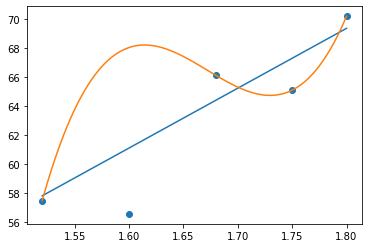

In [40]:
X_train_smooth = np.linspace(X[0], X[4], num=100) 
X_train_poly_smooth = poly_features.fit_transform(X_train_smooth) 
 
import matplotlib.pyplot as plt 
plt.scatter(X,y) 
plt.plot(X_train_smooth, lr.predict(X_train_smooth)) 
plt.plot(X_train_smooth, pr.predict(X_train_poly_smooth)) 
plt.show()

In [41]:
import numpy as np 
X = np.array([[1.52],[1.60],[1.68],[1.75],[1.80]]) 
y = np.array([57.48,56.57,66.11,65.10,70.19]) 
 
i=1 
y_test = y[i] 
X_test = X[i] 
y_train = np.delete(y, i, axis=0) 
X_train = np.delete(X, i, axis=0) 
 
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree=3, include_bias=False) 
X_train_poly = poly_features.fit_transform(X_train) 
X_test_poly = poly_features.fit_transform([X_test]) 

In [42]:
from sklearn.linear_model import LinearRegression  
pr = LinearRegression().fit(X_train_poly, y_train) 
print("Intercept: ", pr.intercept_) 
print("Coefficient: ",pr.coef_)

Intercept:  -20985.957608683406
Coefficient:  [ 37865.65675464 -22675.04852483   4520.76863354]


In [43]:
from sklearn.linear_model import Ridge 
rr = Ridge(alpha=1).fit(X_train_poly, y_train) 
print("Intercept: ", rr.intercept_) 
print("Coefficient: ",rr.coef_) 

Intercept:  44.106563627865654
Coefficient:  [0.4095574  1.34247303 3.30873043]


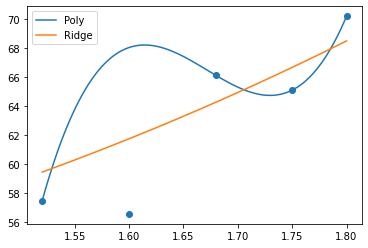

In [44]:
X_train_smooth = np.linspace(X[0], X[4], num=100) 
X_train_poly_smooth = poly_features.fit_transform(X_train_smooth) 
 
import matplotlib.pyplot as plt 
plt.scatter(X,y) 
plt.plot(X_train_smooth, pr.predict(X_train_poly_smooth),label='Poly') 
plt.plot(X_train_smooth, rr.predict(X_train_poly_smooth),label='Ridge') 
plt.legend() 
plt.show() 

In [45]:

import sklearn 
sklearn.__version__ 

'0.24.2'

In [46]:
import numpy as np 
X = np.array([[1.52],[1.60],[1.68],[1.75],[1.80]]) 
y = np.array([57.48,56.57,66.11,65.10,70.19]) 
 
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=3, include_bias=False) 
X_poly = poly_features.fit_transform(X) 
 
from sklearn.linear_model import RidgeCV 
rrcv = RidgeCV(alphas=[1, 0.1, 0.01],store_cv_values=True).fit(X_poly, y) 
print("Intercept: ", rrcv.intercept_) 
print("Coefficient: ",rrcv.coef_) 
print("Best Alpha: ",rrcv.alpha_) 
print("Avg Sq-Error: ",-rrcv.best_score_) 
print("All Sq-Errors: ",rrcv.cv_values_)

Intercept:  34.473066009477535
Coefficient:  [0.49836656 1.80015021 4.83116948]
Best Alpha:  0.1
Avg Sq-Error:  9.882055120945369
All Sq-Errors:  [[1.74735950e-02 8.04271664e+00 1.10752509e+01]
 [2.68442769e+01 1.98208127e+01 1.90991484e+01]
 [1.26782314e+01 1.23969459e+01 1.27958346e+01]
 [2.05005955e+00 5.87133314e+00 6.49065346e+00]
 [1.41346743e+01 3.27846716e+00 2.34257928e+00]]


In [47]:
 
from sklearn.linear_model import Ridge 
rr = Ridge(alpha=0.1).fit(X_poly, y) 
print("Intercept: ", rr.intercept_) 
print("Coefficient: ",rr.coef_) 

Intercept:  34.47306600947718
Coefficient:  [0.49836656 1.80015021 4.83116948]


In [48]:
from sklearn.svm import LinearSVR 
svmr = LinearSVR(epsilon=0, C=1000, max_iter=10000, random_state=0).fit(X, y) 
print("Intercept: ", svmr.intercept_) 
print("Coefficient: ", svmr.coef_) 

Intercept:  [-11.47376621]
Coefficient:  [45.36431987]


In [49]:
print("Estimated weight of 1.65m individual => ", svmr.predict([[1.65]]))

Estimated weight of 1.65m individual =>  [63.37736158]


[Text(167.4, 181.2, 'X[0] <= 1.64\nmse = 27.511\nsamples = 5\nvalue = 63.09'),
 Text(83.7, 108.72, 'X[0] <= 1.56\nmse = 0.207\nsamples = 2\nvalue = 57.025'),
 Text(41.85, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 57.48'),
 Text(125.55000000000001, 36.23999999999998, 'mse = -0.0\nsamples = 1\nvalue = 56.57'),
 Text(251.10000000000002, 108.72, 'X[0] <= 1.775\nmse = 4.842\nsamples = 3\nvalue = 67.133'),
 Text(209.25, 36.23999999999998, 'mse = 0.255\nsamples = 2\nvalue = 65.605'),
 Text(292.95, 36.23999999999998, 'mse = 0.0\nsamples = 1\nvalue = 70.19')]

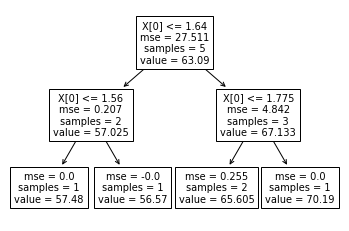

In [50]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor(max_depth=2, min_samples_leaf=1, random_state=0).fit(X, y) 
 
from sklearn import tree 
tree.plot_tree(dtr) 

In [51]:
print("Estimated weight of 1.65m individual => ", dtr.predict([[1.65]])) 

Estimated weight of 1.65m individual =>  [65.605]


In [52]:
print("R-sq of model: ", dtr.score(X, y))

R-sq of model:  0.9962919747297405


In [53]:
DecisionTreeRegressor(criterion='mae', max_depth=2, min_samples_leaf=1, random_state=0)

DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=0)